In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
Use `tf.global_variables_initializer` instead.
cost= 0.0770324
W= 0.253436 b= 0.773828


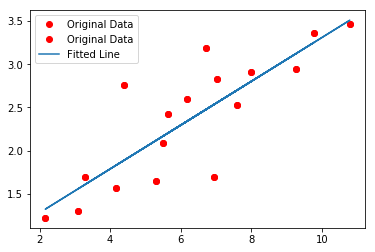

In [3]:
rng = np.random

# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

#Groph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

#Set model weight
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

#Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

#Cost function
cost = tf.reduce_sum(tf.pow(activation - Y, 2)/(2*n_samples))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Initialize varaiables
init = tf.initialize_all_variables()

#Lauch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
    print("cost=", sess.run(cost, feed_dict={X:train_X, Y:train_Y}))
    print("W=", sess.run(W), "b=", sess.run(b))
    
    #Display
    plt.plot(train_X, train_Y, 'ro', label='Original Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("F:/ML/", one_hot=True)

learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

#Groph Input
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

#Set model weight
W = tf.Variable(tf.zeros([784, 10]), name='weight', dtype=tf.float32)
b = tf.Variable(tf.zeros([10]), name='bias', dtype=tf.float32)

#Construct model
activation = tf.nn.softmax(tf.add(tf.matmul(x, W), b))

#Cost function
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Initialize varaiables
init = tf.initialize_all_variables()

#Lauch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        #SGD
        for i in range(total_batch):
            xs, ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={x:xs, y:ys})
            #Calculate the average cost
            avg_cost += c/total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    
    # Test model
    correct_prediction = tf.equal(tf.arg_max(activation, 1), tf.arg_max(y, 1))
    # Calculate the accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("accuracy:", accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))


Extracting F:/ML/train-images-idx3-ubyte.gz
Extracting F:/ML/train-labels-idx1-ubyte.gz
Extracting F:/ML/t10k-images-idx3-ubyte.gz
Extracting F:/ML/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 1.184104102
Epoch: 0002 cost= 0.665338045
Epoch: 0003 cost= 0.552722419
Epoch: 0004 cost= 0.498716523
Epoch: 0005 cost= 0.465543176
Epoch: 0006 cost= 0.442608478
Epoch: 0007 cost= 0.425483386
Epoch: 0008 cost= 0.412205584
Epoch: 0009 cost= 0.401405598
Epoch: 0010 cost= 0.392473864
Epoch: 0011 cost= 0.384807699
Epoch: 0012 cost= 0.378168597
Epoch: 0013 cost= 0.372446137
Epoch: 0014 cost= 0.367313246
Epoch: 0015 cost= 0.362725248
Epoch: 0016 cost= 0.358623804
Epoch: 0017 cost= 0.354858375
Epoch: 0018 cost= 0.351485938
Epoch: 0019 cost= 0.348331728
Epoch: 0020 cost= 0.345445810
Epoch: 0021 cost= 0.342760223
Epoch: 0022 cost= 0.340298400
Epoch: 0023 cost= 0.337913146
Epoch: 0024 cost= 0.335796549
Epoch: 0025 cost= 0.333748965
In

In [7]:
a = tf.zeros(5)
init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    print(a.eval())

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[ 0.  0.  0.  0.  0.]
